In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('Winni Reports.csv')
df.head(10)

,year,date,air_temp_f,water_temp_f,thermocline_depth_ft,wind_speed_mph,wind_dir,weather,location,time,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,duration
0,2015,8/27/2015,65.0,76.3,NaN,8,nw,partly sunny,north of lockes,6:20,salmon,18.0,20.0,NaN,6:20,9:00,2:40
1,2015,8/27/2015,65.0,76.3,NaN,8,nw,partly sunny,north of lockes,7:00,rainbow,16.0,20.0,NaN,6:20,9:00,2:40
2,2015,8/27/2015,65.0,76.3,NaN,8,nw,partly sunny,north of lockes,7:15,small mouth bass,NaN,20.0,NaN,6:20,9:00,2:40
3,2015,8/27/2015,65.0,76.3,NaN,8,nw,partly sunny,north of lockes,8:40,salmon,10.0,37.0,NaN,6:20,9:00,2:40
4,2015,8/28/2015,65.0,76.3,NaN,8,nw,partly sunny,north of diamond,7:45,rainbow,16.0,43.0,NaN,7:15,10:30,3:15
5,2015,4/26/2015,NaN,39.4,NaN,0,NaN,windy,saunders bay,8:00,salmon,18.0,2.0,NaN,8:00,11:00,3:00
6,2015,4/26/2015,NaN,39.4,NaN,0,NaN,windy,saunders bay,8:15,salmon,19.0,2.0,NaN,8:00,11:00,3:00
7,2015,4/26/2015,NaN,39.4,NaN,0,NaN,windy,saunders bay,8:30,salmon,18.0,2.0,NaN,8:00,11:00,3:00
8,2015,4/27/2015,NaN,40.3,NaN,0,NaN,windy,east of little bear bay,7:00,salmon,NaN,21.5,NaN,7:00,11:30,4:30
9,2015,4/27/2015,NaN,40.3,NaN,0,NaN,windy,east of little bear bay,8:00,salmon,NaN,2.0,NaN,7:00,11:30,4:30


In [4]:
df.shape

(454, 17)

In [5]:
df.dtypes

year                      int64
date                     object
air_temp_f              float64
water_temp_f            float64
thermocline_depth_ft    float64
wind_speed_mph            int64
wind_dir                 object
weather                  object
location                 object
time                     object
fish_type                object
fish_length_in          float64
water_depth_ft          float64
skunked                  object
lines_in                 object
lines_out                object
duration                 object
dtype: object

In [6]:
df.isnull().sum()

year                      0
date                      0
air_temp_f               51
water_temp_f             36
thermocline_depth_ft    418
wind_speed_mph            0
wind_dir                 67
weather                  20
location                  0
time                     71
fish_type                71
fish_length_in           80
water_depth_ft           91
skunked                 383
lines_in                  0
lines_out                 0
duration                  0
dtype: int64

In [7]:
def rough_location(col):
    name_list = []
    directions = ['east', 'west', 'north', 'south', 'of']

    for i in col.split():
        if i not in directions:
            name_list.append(i)
    return ' '.join(name_list)

In [8]:
df['location2'] = df['location'].map(lambda x: rough_location(x))

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df.loc[(df['wind_dir'] == 'ene')]

,year,date,air_temp_f,water_temp_f,thermocline_depth_ft,wind_speed_mph,wind_dir,weather,location,time,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,duration,location2
320,2018,2018-05-27,57.0,59.3,NaN,15,ene,overcast,west of timber,8:10,lake trout,20.0,27.0,NaN,7:50,10:45,2:55,timber


In [11]:
df.at[321,'wind_dir']= 'ne'

In [12]:
def change_fish_type(fish):
    if fish == 'small mouth bass':
        return 'smallmouth'
    elif fish == 'salmon ':
        return 'salmon'
    elif fish == 'lake trout ':
        return 'lake trout'
    return fish

df['fish_type'] = df['fish_type'].map(change_fish_type)

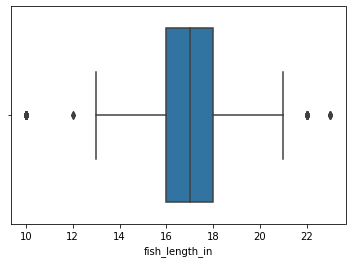

In [13]:
sns.boxplot(x = df['fish_length_in']);

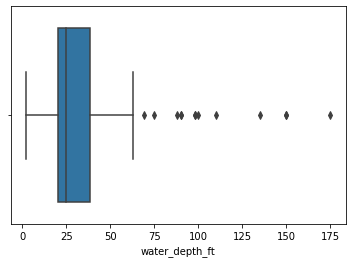

In [14]:
sns.boxplot(x = df['water_depth_ft']);

In [15]:
df.loc[df['year'] == '14:30']

,year,date,air_temp_f,water_temp_f,thermocline_depth_ft,wind_speed_mph,wind_dir,weather,location,time,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,duration,location2


In [16]:
df.loc[df['year'] == '7:40']

,year,date,air_temp_f,water_temp_f,thermocline_depth_ft,wind_speed_mph,wind_dir,weather,location,time,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,duration,location2


In [17]:
df = df.drop(columns = 'thermocline_depth_ft')

In [18]:
def change_weather(condition):
    if condition == 'calm' or condition == 'partly sunny':
        return 'sunny'
    elif condition == 'slight wind':
        return 'windy'
    elif condition == 'rainy':
        return 'raining'
    elif condition == 'cloudy':
        return 'overcast'
    return condition

df['weather'] = df['weather'].map(change_weather)

In [19]:
df['time2'] = pd.to_datetime(df['time'])
#df['time2'] = df['time2'].dt.time

In [20]:
#df.iloc[451, df.columns.get_loc('skunked')] = True

In [21]:
#df['lines_in'] = pd.to_datetime(df['lines_in'])
#df['lines_in'] = df['lines_in'].dt.time

In [22]:
#df['lines_out'] = pd.to_datetime(df['lines_out'])
#df['lines_out'] = df['lines_out'].dt.time

In [23]:
df['duration'] =  pd.to_datetime(df['duration'])
df['minutes'] = df['duration'].dt.hour * 60 + df['duration'].dt.minute + df['duration'].dt.second/60
df.drop(columns = 'duration', inplace = True)
df.head()

,year,date,air_temp_f,water_temp_f,wind_speed_mph,wind_dir,weather,location,time,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,location2,time2,minutes
0,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,6:20,salmon,18.0,20.0,NaN,6:20,9:00,lockes,2022-06-11 06:20:00,160.0
1,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,7:00,rainbow,16.0,20.0,NaN,6:20,9:00,lockes,2022-06-11 07:00:00,160.0
2,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,7:15,smallmouth,NaN,20.0,NaN,6:20,9:00,lockes,2022-06-11 07:15:00,160.0
3,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,8:40,salmon,10.0,37.0,NaN,6:20,9:00,lockes,2022-06-11 08:40:00,160.0
4,2015,2015-08-28,65.0,76.3,8,nw,sunny,north of diamond,7:45,rainbow,16.0,43.0,NaN,7:15,10:30,diamond,2022-06-11 07:45:00,195.0


## Imputing NaNs

In [24]:
df.dtypes

year                       int64
date              datetime64[ns]
air_temp_f               float64
water_temp_f             float64
wind_speed_mph             int64
wind_dir                  object
weather                   object
location                  object
time                      object
fish_type                 object
fish_length_in           float64
water_depth_ft           float64
skunked                   object
lines_in                  object
lines_out                 object
location2                 object
time2             datetime64[ns]
minutes                  float64
dtype: object

In [25]:
df.isnull().sum()

year                0
date                0
air_temp_f         51
water_temp_f       36
wind_speed_mph      0
wind_dir           67
weather            20
location            0
time               71
fish_type          71
fish_length_in     80
water_depth_ft     91
skunked           383
lines_in            0
lines_out           0
location2           0
time2              71
minutes             0
dtype: int64

In [26]:
df['month'] = df['date'].dt.month
df.head()

,year,date,air_temp_f,water_temp_f,wind_speed_mph,wind_dir,weather,location,time,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,location2,time2,minutes,month
0,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,6:20,salmon,18.0,20.0,NaN,6:20,9:00,lockes,2022-06-11 06:20:00,160.0,8
1,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,7:00,rainbow,16.0,20.0,NaN,6:20,9:00,lockes,2022-06-11 07:00:00,160.0,8
2,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,7:15,smallmouth,NaN,20.0,NaN,6:20,9:00,lockes,2022-06-11 07:15:00,160.0,8
3,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,8:40,salmon,10.0,37.0,NaN,6:20,9:00,lockes,2022-06-11 08:40:00,160.0,8
4,2015,2015-08-28,65.0,76.3,8,nw,sunny,north of diamond,7:45,rainbow,16.0,43.0,NaN,7:15,10:30,diamond,2022-06-11 07:45:00,195.0,8


In [27]:
air_temp_dict = df.groupby('month')['air_temp_f'].mean().to_dict()
df['air_temp_f'] = df['air_temp_f'].fillna(df['month'].map(air_temp_dict))
water_temp_dict = df.groupby('month')['water_temp_f'].mean().to_dict()
df['water_temp_f'] = df['water_temp_f'].fillna(df['month'].map(water_temp_dict))
fish_length_dict = df.groupby('fish_type')['fish_length_in'].mean().to_dict()
df['fish_length_in'] = df['fish_length_in'].fillna(df['fish_type'].map(fish_length_dict))

In [28]:
df['wind_dir'].fillna('no_wind', inplace=True)

In [29]:
df['skunked'].fillna(False, inplace = True)

In [30]:
df['weather'].fillna('no_weather_recorded', inplace = True)
df['time'].fillna('no_time_recorded', inplace = True)
df['fish_type'].fillna('no_fish_caught', inplace = True)
#df['fish_length_in'].fillna('no_recording', inplace = True)
#df['water_depth_ft'].fillna('no_fish_caught', inplace = True)

In [31]:
df.rename(columns = {'minutes': 'duration_min', 'location2': 'general_loc', 'time':'time_caught'}, inplace = True)
df.drop(columns = 'time2', inplace = True)

In [32]:
df['hour'] = df['time_caught'].map(lambda x:re.search(r'.*(?=:)',x)[0] if x != 'no_time_recorded' else 0)

In [33]:
df['hour'] = df['hour'].astype(int)

In [34]:
df['time_caught_bucket'] = pd.cut(df['hour'], bins=range(5, 18, 2), right=False)

In [35]:
df.head()

,year,date,air_temp_f,water_temp_f,wind_speed_mph,wind_dir,weather,location,time_caught,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,general_loc,duration_min,month,hour,time_caught_bucket
0,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,6:20,salmon,18.0,20.0,False,6:20,9:00,lockes,160.0,8,6,"[5, 7)"
1,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,7:00,rainbow,16.0,20.0,False,6:20,9:00,lockes,160.0,8,7,"[7, 9)"
2,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,7:15,smallmouth,12.8,20.0,False,6:20,9:00,lockes,160.0,8,7,"[7, 9)"
3,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,8:40,salmon,10.0,37.0,False,6:20,9:00,lockes,160.0,8,8,"[7, 9)"
4,2015,2015-08-28,65.0,76.3,8,nw,sunny,north of diamond,7:45,rainbow,16.0,43.0,False,7:15,10:30,diamond,195.0,8,7,"[7, 9)"


In [36]:
df.dtypes

year                           int64
date                  datetime64[ns]
air_temp_f                   float64
water_temp_f                 float64
wind_speed_mph                 int64
wind_dir                      object
weather                       object
location                      object
time_caught                   object
fish_type                     object
fish_length_in               float64
water_depth_ft               float64
skunked                         bool
lines_in                      object
lines_out                     object
general_loc                   object
duration_min                 float64
month                          int64
hour                           int64
time_caught_bucket          category
dtype: object

In [37]:
df2 = df.loc[(df['water_depth_ft'] != 'no_fish_caught')]

df2['water_depth_ft'] = df2['water_depth_ft'].astype(float)

df2['month'] = df2['month'].astype(str)

df2['fish_type_month'] = df2['fish_type']  + '_' + df2['month']

df2['month'] = df2['month'].astype(int)

df2.head()

,year,date,air_temp_f,water_temp_f,wind_speed_mph,wind_dir,weather,location,time_caught,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,general_loc,duration_min,month,hour,time_caught_bucket,fish_type_month
0,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,6:20,salmon,18.0,20.0,False,6:20,9:00,lockes,160.0,8,6,"[5, 7)",salmon_8
1,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,7:00,rainbow,16.0,20.0,False,6:20,9:00,lockes,160.0,8,7,"[7, 9)",rainbow_8
2,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,7:15,smallmouth,12.8,20.0,False,6:20,9:00,lockes,160.0,8,7,"[7, 9)",smallmouth_8
3,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,8:40,salmon,10.0,37.0,False,6:20,9:00,lockes,160.0,8,8,"[7, 9)",salmon_8
4,2015,2015-08-28,65.0,76.3,8,nw,sunny,north of diamond,7:45,rainbow,16.0,43.0,False,7:15,10:30,diamond,195.0,8,7,"[7, 9)",rainbow_8


In [38]:
df['water_depth_ft'].value_counts()

20.0     59
25.0     35
15.0     32
45.0     29
2.0      26
35.0     21
51.0     17
31.0     16
27.0     15
17.0     11
29.0     11
23.0     10
43.0      9
37.0      8
47.0      6
49.0      5
10.0      4
33.0      4
30.0      4
41.0      4
39.0      4
38.0      3
98.0      2
21.0      2
18.0      2
63.0      2
150.0     2
13.0      2
90.0      2
175.0     1
53.0      1
36.0      1
75.0      1
8.0       1
14.0      1
28.0      1
48.0      1
100.0     1
22.0      1
21.5      1
19.0      1
88.0      1
135.0     1
110.0     1
69.0      1
Name: water_depth_ft, dtype: int64

In [39]:
df_water_depth = df.loc[df['water_depth_ft'].isnull() == False]
df_water_depth['water_depth_ft'] = df_water_depth['water_depth_ft'].astype(float)
water_depth_dict = df_water_depth.groupby('fish_type')['water_depth_ft'].mean().to_dict()
water_depth_dict

/var/folders/qp/clfzg_bn2wlgtrx99d36qsxw0000gn/T/ipykernel_16519/3103458991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_water_depth['water_depth_ft'] = df_water_depth['water_depth_ft'].astype(float)


{'horned pout': 35.0,
 'lake trout': 40.87301587301587,
 'rainbow': 32.82857142857143,
 'salmon': 26.479166666666668,
 'smallmouth': 25.333333333333332,
 'white perch': 27.857142857142858}

In [40]:
df['water_depth_ft'] = df['water_depth_ft'].fillna(df['fish_type'].map(water_depth_dict))

In [41]:
df['water_depth_ft'].fillna(0, inplace = True)

In [42]:
df['year'].value_counts()

2015    179
2018    100
2017     70
2019     48
2016     44
2022      9
2020      3
2021      1
Name: year, dtype: int64

In [43]:
df.dtypes

year                           int64
date                  datetime64[ns]
air_temp_f                   float64
water_temp_f                 float64
wind_speed_mph                 int64
wind_dir                      object
weather                       object
location                      object
time_caught                   object
fish_type                     object
fish_length_in               float64
water_depth_ft               float64
skunked                         bool
lines_in                      object
lines_out                     object
general_loc                   object
duration_min                 float64
month                          int64
hour                           int64
time_caught_bucket          category
dtype: object

In [44]:
df_fish_len = df.loc[df['fish_length_in'] != 'no_recording']
df_fish_len['fish_length_in'] = df_fish_len['fish_length_in'].astype(float)
fish_len_dict = df_fish_len.groupby('fish_type')['fish_length_in'].mean().to_dict()
fish_len_dict

{'horned pout': 10.0,
 'lake trout': 17.555555555555554,
 'no_fish_caught': nan,
 'rainbow': 15.815068493150685,
 'salmon': 17.26222222222222,
 'smallmouth': 12.799999999999999,
 'white perch': 10.0}

In [45]:
df['fish_length_in'] = df['fish_length_in'].fillna(df['fish_type'].map(fish_len_dict))

In [46]:
df['fish_length_in'].fillna(0, inplace = True)

In [47]:
df['fish_length_in'] = df['fish_length_in'].astype(float)

In [48]:
df.to_csv('./model_data/winni_reports.csv')